In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from LogisticRegression import LogisticRegression as LogisticRegressionBTS
from sklearn.linear_model import LogisticRegression as LogisticRegressionSKL
import CrossValidation as cv
import utils as ut

In [6]:
train_fname = 'train.csv'
test_fname = 'test.csv'

In [4]:
data_train , y_train = ut.load_comments(train_fname)
data_train = ut.process(data_train)
X_train = ut.get_features(data_train)

Loading comments


In [2]:
toy = pd.read_csv('toy.csv')
X = toy.values[:,:2]
y = toy.values[:,2]
y[y==0]=-1

In [3]:
y

array([ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
        1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
        1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.])

In [3]:
X,y, coef =sk.datasets.make_regression(n_samples=50, n_features=2, coef=True) 

In [14]:
import logreg as lg
lo = lg.LogisticRegression(tol=1e-2)
lo.fit(X,y)

Fitting...
4.66541555503 [ 1.12341737  0.42468946  0.29889919]
0.200908547324 [ 1.1684781   0.25248134  0.09589423]
0.0400554073142 [ 1.17752997  0.24098903  0.07200303]
0.0281445163749 [ 1.19119131  0.24563646  0.05156692]
0.0350511257259 [ 1.21385775  0.27931787  0.04103945]
0.0210082723146 [ 1.22756193  0.27396042  0.02284144]
0.0148563153469 [ 1.23799498  0.28861473  0.02499945]
0.0273504559132 [ 1.26259052  0.28879929  0.0070121 ]
0.00962856709579 [ 1.26732068  0.29689328  0.01136533]
[ 0.29689328  0.01136533] 1.26732067695


In [15]:
lo.score(X,y)

0.118357203254 0.772140534853


0.47666666666666668

In [7]:
lo.coeff

array([ 0.14013655,  0.2788316 ])

In [20]:
lo.intercept

0.62833579050121802

In [8]:
reglog = LogisticRegressionSKL()
reglog.fit(X,y)
print (reglog.coef_,reglog.intercept_)

ValueError: Unknown label type: array([  5.71041308e+01,  -1.20341534e+01,   2.61533893e+01,
         8.97946163e+01,   7.36532404e+01,  -1.72122668e+01,
         8.90374545e+00,   1.50893021e+01,  -2.13071642e+00,
         1.73832698e-02,   3.22318306e+01,  -4.77414690e+00,
        -1.49646776e+01,   2.30325057e-01,   4.38696577e+01,
         1.22027961e+01,  -9.19593259e+00,  -3.19399195e+01,
         6.96197227e+01,  -2.66328418e+01,  -5.30746692e+01,
        -4.19692165e+01,  -3.80268592e+01,   7.85388528e+01,
         4.68077267e+01,   2.71491709e+01,   4.01890892e+01,
        -1.86137941e+01,   5.97471274e+01,   4.82134087e+01,
         1.08131270e+02,   2.49923235e+01,   1.18068546e+01,
         1.48655565e+01,  -1.62880984e+01,  -1.19284163e+02,
         7.27012107e+01,   7.56097610e+01,   7.68486361e+01,
         3.15944870e+01,   1.14314146e+01,  -2.65913749e+01,
        -6.69606863e+00,   1.20185632e+01,  -3.27793871e+00,
         9.55071811e+00,  -8.94505333e+00,   2.10546191e+01,
         4.84770026e+01,  -4.78851952e+01])

ValueError: Using arbitrary long args with data is not supported due to ambiguity of arguments.
Use multiple plotting calls instead.

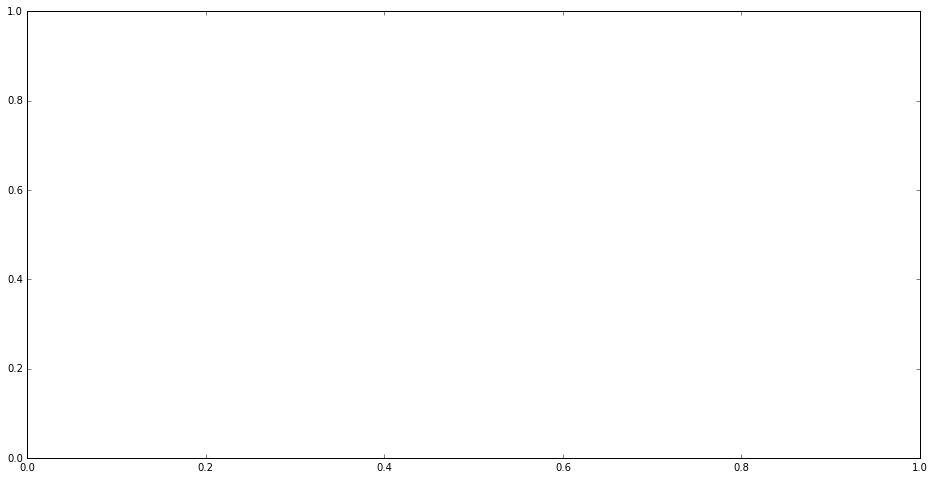

In [8]:
plt.figure(figsize=(16,8))
ax=plt.gca()
plt.plot(data=X[y==-1,:],kind='scatter',x='var1',z='var2',label='Negative Example',color='#AA0000')
plt.plot(data=X[y==1,:],kind='scatter',x='var1',z='var2',label='Positive Example',color='#00AA00')
plt.legend(loc='best')
plt.title('Toy Data')
x = np.linspace(-10,15)
plt.plot(x, x*lo.coeff[0]+lo.intercept);
plt.show()

## Génération de data

In [2]:
n = 500
X,y = sk.datasets.make_blobs(n_samples=n, n_features=2, centers=2, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

In [3]:
y[y==0]=-1

In [4]:
y

array([-1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,
        1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,
        1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1,  1, -1, -1,  1

In [5]:
import logreg as lg
lo = lg.LogisticRegression(tol=1e-8,gamma=0.1)
lo.fit(X,y)

Fitting...
3.77298621146 [ 0.97495962  0.43636615 -0.84383013]
0.720308284539 [ 0.9498899   0.1958564  -0.86572721]
0.380798208385 [ 0.93628601  0.04723085 -0.71491392]
0.0506496504663 [ 0.91631535 -0.12087527 -0.45695839]
0.0109721589536 [ 0.90749932 -0.15509579 -0.41317669]
0.00152436958256 [ 0.90044725 -0.16918481 -0.39225953]
0.000549136808424 [ 0.89442011 -0.17318775 -0.38570795]
0.000504985045527 [ 0.88315158 -0.17416706 -0.38265094]
0.000566440766892 [ 0.86152753 -0.16930815 -0.38636263]
0.000955577029301 [ 0.83937319 -0.17267967 -0.37834648]
0.000647566953947 [ 0.82947521 -0.16514502 -0.38751998]
0.000515236137988 [ 0.81851941 -0.1681281  -0.3817786 ]
0.000796900160349 [ 0.79820861 -0.16087531 -0.38885708]
0.000561394755567 [ 0.78733436 -0.16547006 -0.38111989]
0.00111105703781 [ 0.76775653 -0.15615769 -0.39067934]
0.000432779120098 [ 0.76231093 -0.15969768 -0.38545871]
0.000408458224872 [ 0.75216286 -0.16022139 -0.38323672]
0.000447877562034 [ 0.73259124 -0.15612058 -0.3861681

In [6]:
lo.score(X,y)

0.0203459542497 0.979833661569


1.0

In [9]:
reglog = LogisticRegressionSKL(C=1/float(n),tol=1e-10)
reglog.fit(X,y)
print(reglog.coef_,reglog.intercept_,lo.coeff,lo.intercept)

[[-0.07990164 -0.38884779]] [-0.00768497] [-0.03133798 -0.39422806] -0.480171464761


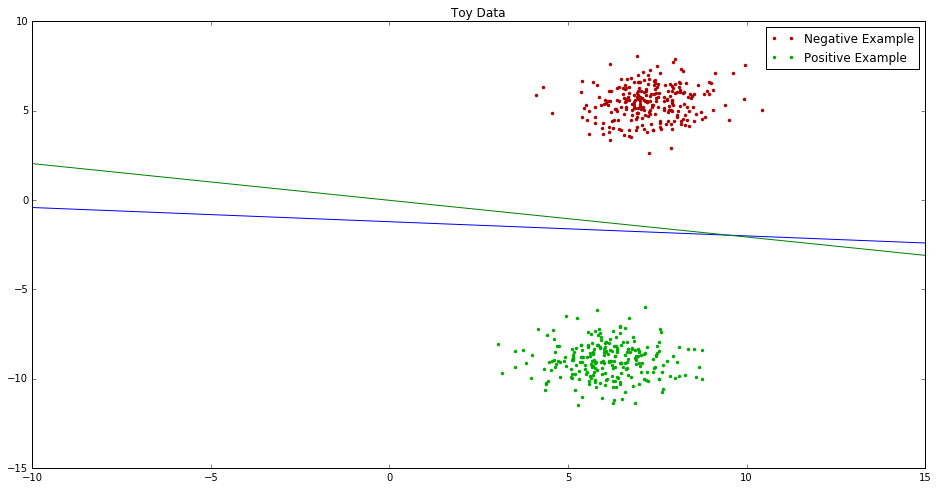

In [10]:
plt.figure(figsize=(16,8))
A = X[y==-1]
B = X[y==1]
plt.plot(A[:,0],A[:,1],'.',label='Negative Example',color='#AA0000')
plt.plot(B[:,0],B[:,1],'.',label='Positive Example',color='#00AA00')
plt.legend(loc='best')
plt.title('Toy Data')
x = np.linspace(-10,15)
plt.plot(x, -lo.coeff[0]*x/lo.coeff[1]-lo.intercept/lo.coeff[1]);
plt.plot(x, -reglog.coef_[0][0]*x/reglog.coef_[0][1]-reglog.intercept_[0]/reglog.coef_[0][1],color='green');
plt.show()

In [41]:
A[1,:]

array([-0.74916523,  0.63572601])

In [ ]:
data_test = ut.load_comments(test_fname, test = True)

In [ ]:
data_test = ut.process(data_test)

In [ ]:
X_test = ut.get_features(data_test)

In [ ]:
#y_pred = logreg.predict(X_test)
y_pred = logreg.predict(X_test)
np.savetxt('y_pred.txt', y_pred, fmt='%s')
y_pred